In [124]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from collections import namedtuple
from collections import deque

In [3]:
%matplotlib inline

In [13]:
class Camera():
    def __init__(self, nx = 9 , ny = 6 ):
        images = glob.glob('camera_cal/calibration*.jpg')
        self.matrix = None
        self.dist  = None
        self.caliberate_camera(images,nx,ny)
    
    def __call__(self,image):
        if self.matrix is not None and self.dist is not None:
            return cv2.undistort(image,self.matrix, self.dist, None, self.matrix)

    def caliberate_camera(self,images,nx,ny):
        obj_points = []
        img_points = []
        objp = np.zeros((nx*ny,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx , 0:ny].T.reshape(-1,2)
        
        for img in images:
                frame = cv2.cvtColor( cv2.imread(img), cv2.COLOR_BGR2GRAY)
                ret, corners = cv2.findChessboardCorners(frame, (nx,ny) ,None)
                if ret == True:
                        obj_points.append(objp)
                        img_points.append(corners)
        ret ,self.matrix,self.dist ,tvecs , _ = cv2.calibrateCamera(obj_points, img_points, frame.shape[::-1],None,None)
#         return mtx, dist

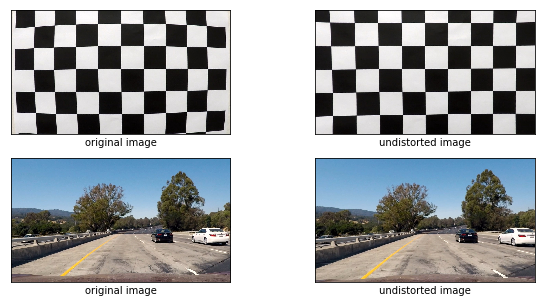

In [15]:
#Lets test the code now...
camera = Camera()

img1 = cv2.imread('camera_cal/calibration1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
undist_img1 = camera(img1)

img2 = cv2.imread('test_images/test1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
undist_img2 = camera(img2)

plt.figure(figsize=(10,5))

plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.xlabel('original image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2, 2, 2)
plt.imshow(undist_img1)
plt.xlabel('undistorted image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2, 2, 3)
plt.imshow(img2)
plt.xlabel('original image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2, 2, 4)
plt.imshow(undist_img2)
plt.xlabel('undistorted image')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [5]:
#Great, it look fine so we I will continue forward
#Now Lets do Perspective transform 

In [35]:
def Perspective_transform(img):
    h = img.shape[0]
    w = img.shape[1]
    
    pt1 = [w // 2 - 76, h* 0.625]
    pt2 = [w // 2 + 76, h * 0.625]
    pt3 = [-100, h]
    pt4 = [w + 100, h]
    
    src = np.float32([pt1, pt2, pt3, pt4])
    
    dp1 = [100, 0]
    dp2 = [w - 100, 0]
    dp3 = [100, h]
    dp4 = [w - 100, h]
    dst = np.float32([dp1, dp2, dp3, dp4])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (w, h))
    unwrap = cv2.getPerspectiveTransform(dst, src)
    return (warped, unwrap)

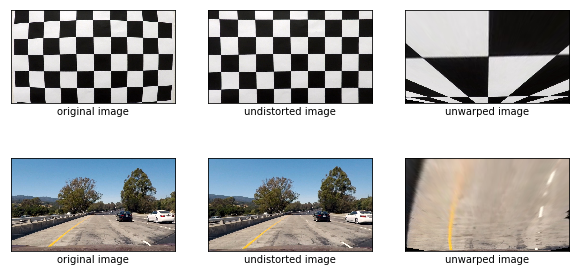

In [37]:
#lets check if the function is working properly or not
#img3 = cv2.imread('test_images/test1.jpg')
warped_img_1  ,  Inverse_Transform_Matrix =  Perspective_transform(undist_img1)
warped_img_2  ,  Inverse_Transform_Matrix =  Perspective_transform(undist_img2)
plt.figure(figsize=(10,5))
plt.subplot(2,3, 1)
plt.imshow(img1)
plt.xlabel('original image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2,3,2)
plt.imshow(undist_img1)
plt.xlabel('undistorted image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2,3,3)
plt.imshow(warped_img_1)
plt.xlabel('unwarped image')
plt.xticks([], [])
plt.yticks([], [])

plt.subplot(2,3, 4)
plt.imshow(img2)
plt.xlabel('original image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2,3,5)
plt.imshow(undist_img2)
plt.xlabel('undistorted image')
plt.xticks([], [])
plt.yticks([], [])
plt.subplot(2,3,6)
plt.imshow(warped_img_2)
plt.xlabel('unwarped image')
plt.xticks([], [])
plt.yticks([], [])

plt.show()

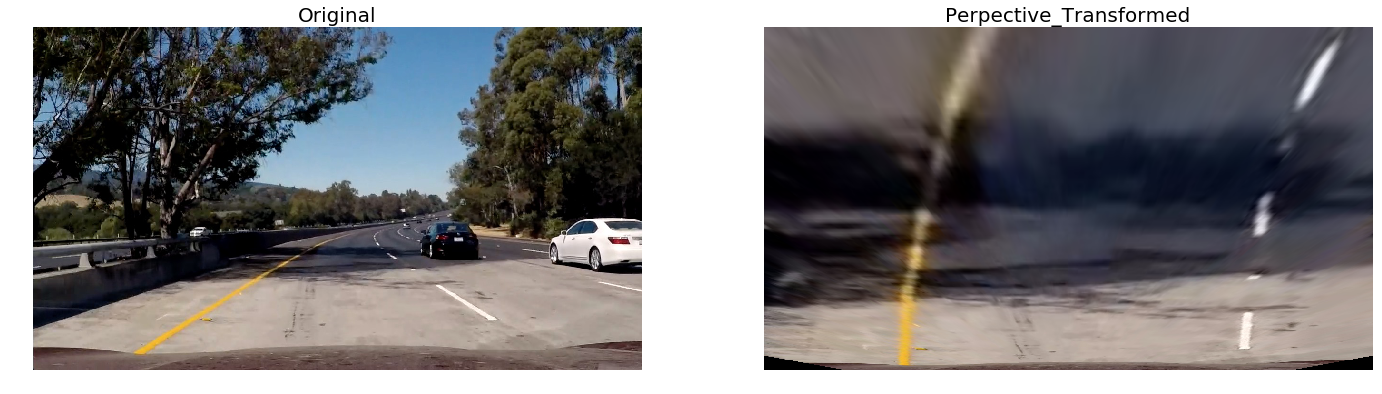

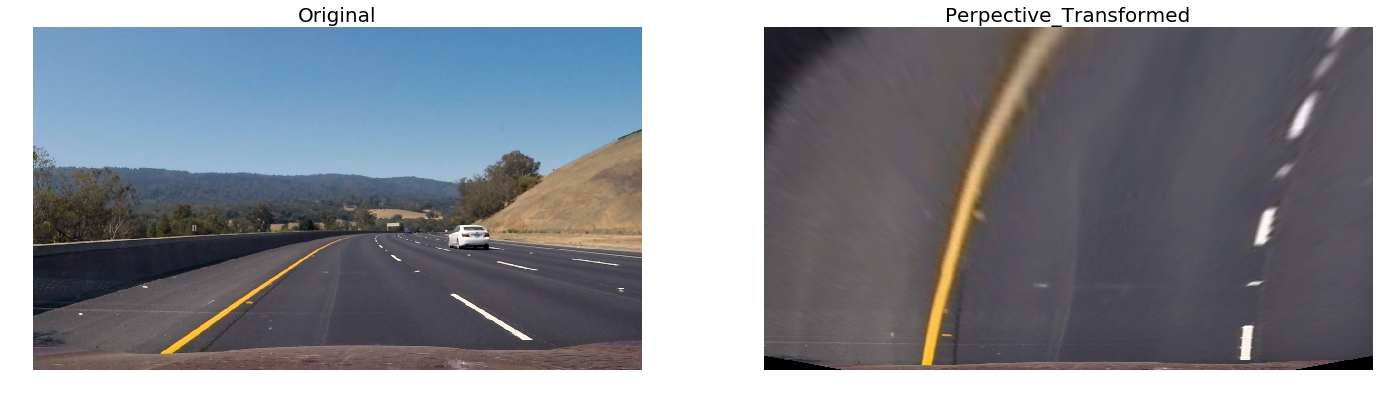

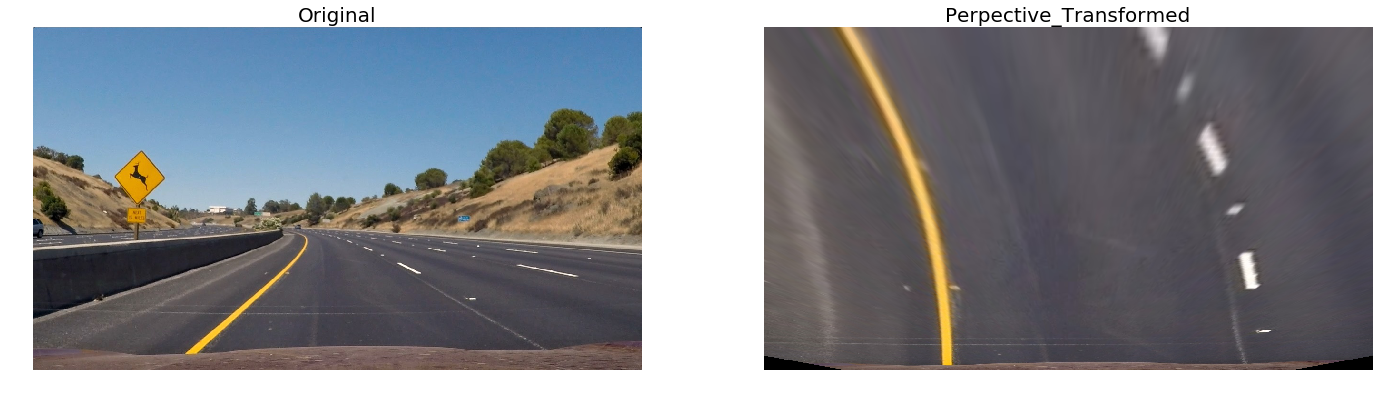

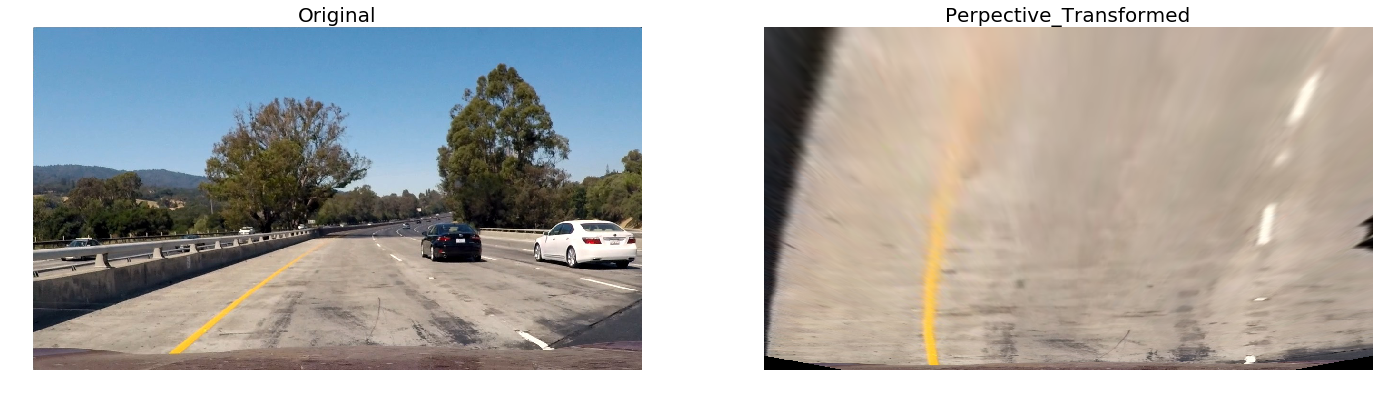

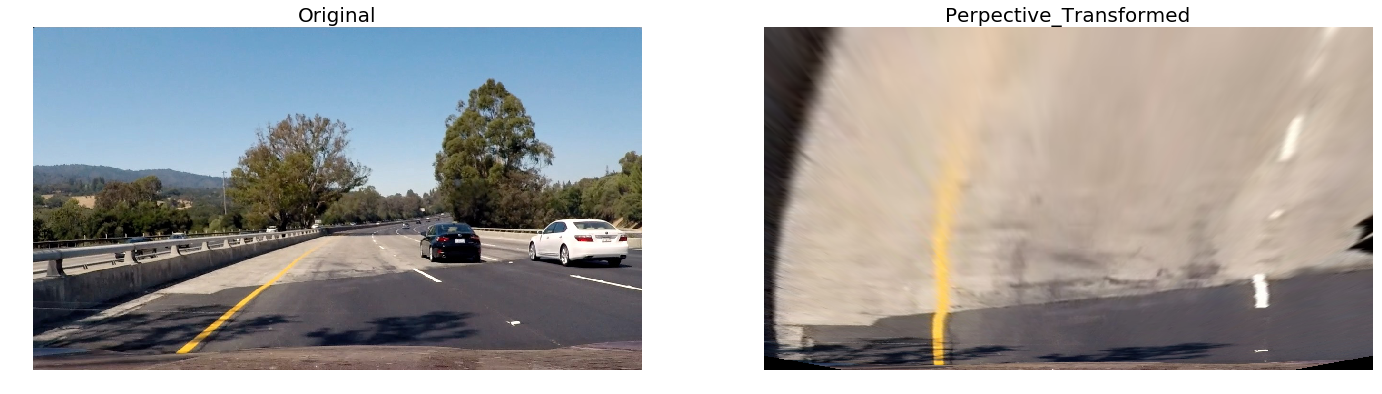

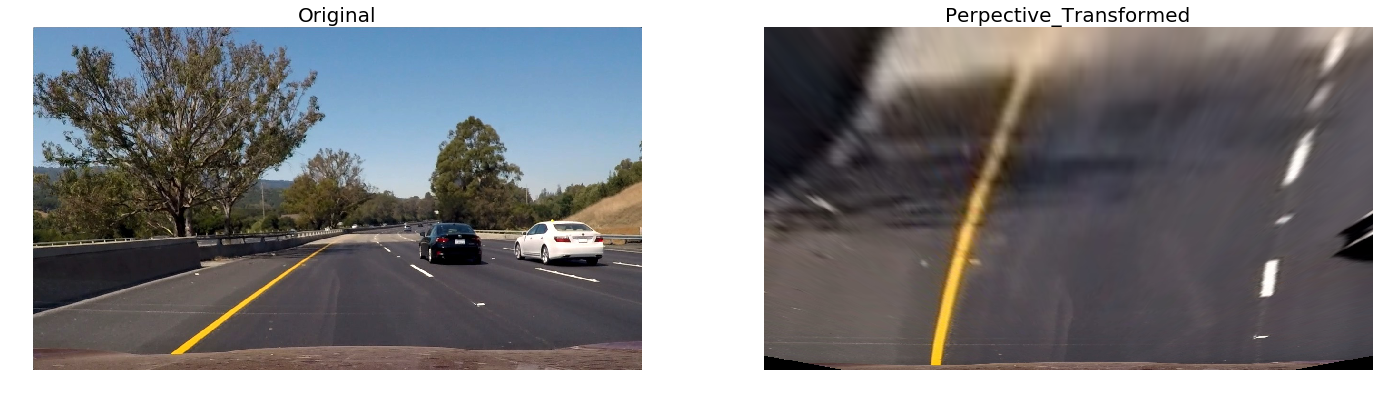

In [132]:
for img in glob.glob('test_images/test*.jpg'):
    image = mpimg.imread(img)
    transformed, _ = Perspective_transform(image) 
    t, (x1, x2) = plt.subplots(1, 2, figsize=(24, 9))
    x1.axis('off')
    x1.imshow(image)
    x1.set_title('Original', fontsize=20)

    x2.axis('off')
    x2.imshow(transformed)
    x2.set_title('Perpective_Transformed', fontsize=20)

In [8]:
#great I think the function is doing its Job, Lets continue forward

In [9]:
#Lets experiement with Colorspaces (HLS)

In [10]:
#we need to find the Lane Lines so, lets use the unwarped image...
R = warped_img_2[:,:,0]
G = warped_img_2[:,:,1]
B = warped_img_2[:,:,2]

img2_hsv = cv2.cvtColor(warped_img_2, cv2.COLOR_RGB2HSV)
H = img2_hsv[:,:,0]
S = img2_hsv[:,:,1]
V = img2_hsv[:,:,2]

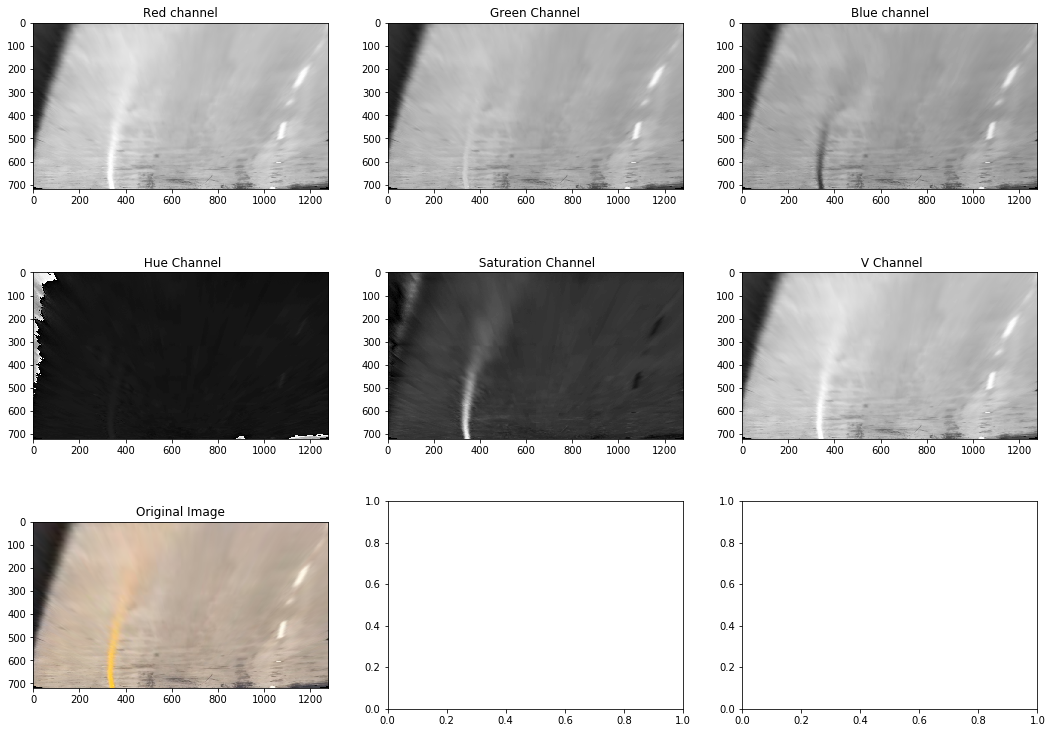

In [11]:
fig, axs = plt.subplots(3,3, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(R, cmap='gray')
axs[0].set_title('Red channel')
axs[1].imshow(G, cmap='gray')
axs[1].set_title('Green Channel')
axs[2].imshow(B, cmap='gray')
axs[2].set_title('Blue channel')
axs[3].imshow( H, cmap='gray')
axs[3].set_title(' Hue Channel')
axs[4].imshow( S, cmap='gray')
axs[4].set_title(' Saturation Channel')
axs[5].imshow( V, cmap='gray')
axs[5].set_title(' V Channel')
axs[6].imshow( warped_img_2)
axs[6].set_title('Original Image')

In [12]:
#Now Time to apply Sobel Threshold.....
def Sobel_thresh(img, orient = 'x' , min_thresh = 0 , max_thresh = 255 ):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel = cv2.Sobel(img, cv2.CV_64F, orient == 'x' , orient == 'y')
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= min_thresh) & (scaled_sobel <= max_thresh)] = 1
    return binary_output

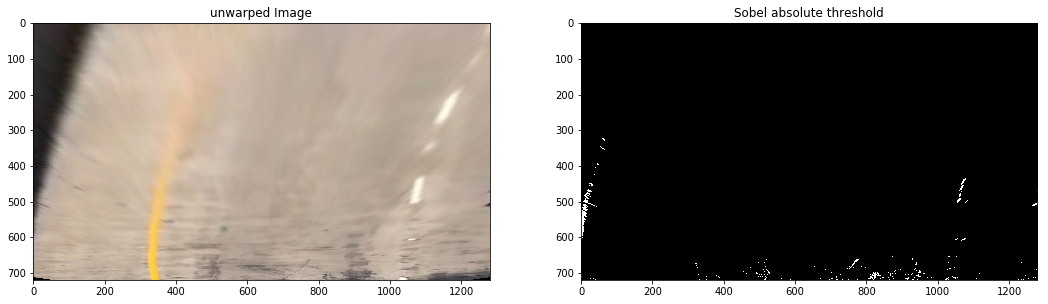

In [13]:
#Now lets see if its working or not...
sobel_img_thresh  = Sobel_thresh(warped_img_2,'x',30,100)
fig, axs = plt.subplots(1,2, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(warped_img_2)
axs[0].set_title('unwarped Image')
axs[1].imshow(sobel_img_thresh, cmap='gray')
axs[1].set_title('Sobel absolute threshold')

In [14]:
#ok not bad...let see what more we can do
def magnitude_sobel_threshold(img,kszie = 13 , thresh = (30,100)):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0,1)
    magnitude_sobel = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*magnitude_sobel/np.max(magnitude_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

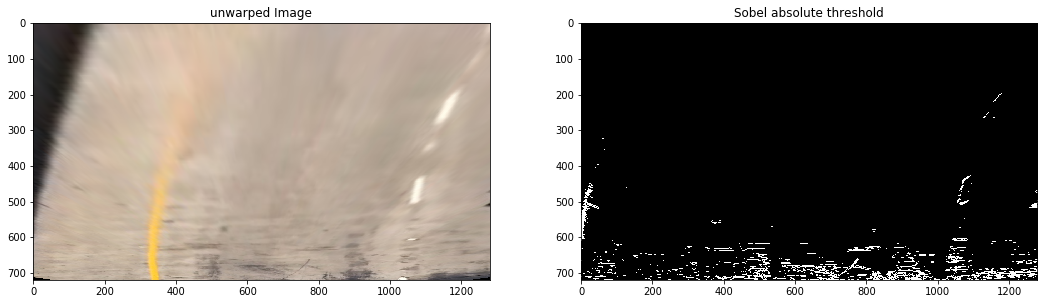

In [15]:
#Now lets see if its working or not...
sobel_img_thresh  = magnitude_sobel_threshold(warped_img_2,13,(15,80))
fig, axs = plt.subplots(1,2, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(warped_img_2)
axs[0].set_title('unwarped Image')
axs[1].imshow(sobel_img_thresh, cmap='gray')
axs[1].set_title('Sobel absolute threshold')

In [16]:
#Lets Try Directional threshold
def Sobel_directonal(img, ksize = 13 ,thresh =(0,(np.pi)/2)):
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1,0)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0,1)
        sobelx_abs = np.absolute(sobelx)
        sobely_abs = np.absolute(sobely)
        dir_grad = np.arctan2(sobely_abs,sobelx_abs)
        binary_output = np.zeros_like(dir_grad)
        binary_output[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1
        return binary_output

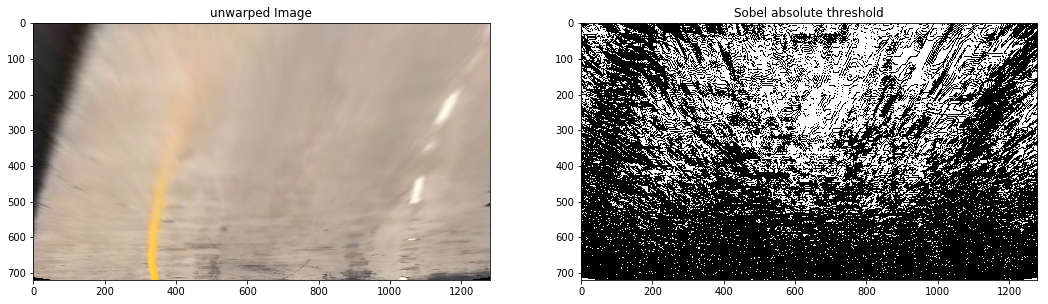

In [17]:
#Now lets see if its working or not...
sobel_img_thresh  = Sobel_directonal(warped_img_2,13,(0,0.09))
fig, axs = plt.subplots(1,2, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(warped_img_2)
axs[0].set_title('unwarped Image')
axs[1].imshow(sobel_img_thresh, cmap='gray')
axs[1].set_title('Sobel absolute threshold')

In [18]:
#Lets Combine the magniude and directional threshold.....
def combine_mag_and_dir(img1,img2):
    result  = np.zeros_like(img1)
    result[(img1==1) & (img2==1)] = 1
    return result

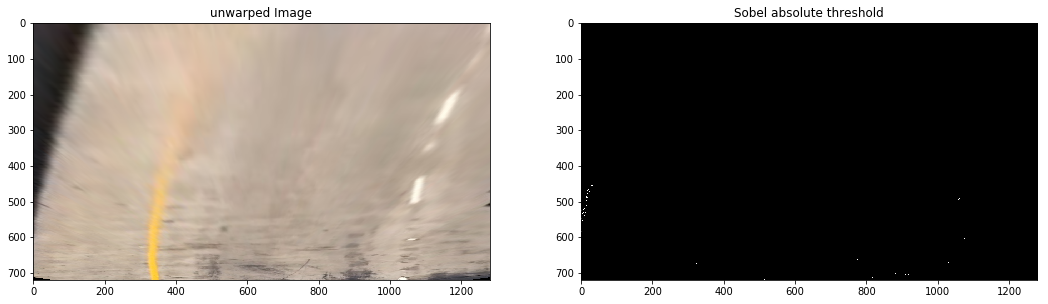

In [19]:
#Now lets see if its working or not...
sobel_img_1  = Sobel_directonal(warped_img_2,13,(0,0.09))
sobel_img_2  = magnitude_sobel_threshold(warped_img_2,13,(15,80))
combined_img = combine_mag_and_dir(sobel_img_1,sobel_img_2)
fig, axs = plt.subplots(1,2, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(warped_img_2)
axs[0].set_title('unwarped Image')
axs[1].imshow(combined_img, cmap='gray')
axs[1].set_title('Sobel absolute threshold')

In [20]:
#This looks good as we can see all the noises are eliminated, now lets start 

In [21]:
#Now lets do S channel Thresholding....
def s_thresh(img,thresh=(30,100)):
    hls  = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s = hls[:,:,2]
    binary_output = np.zeros_like(s)
    binary_output[(s>= thresh[0]) & (s<= thresh[1])] = 1
    return binary_output

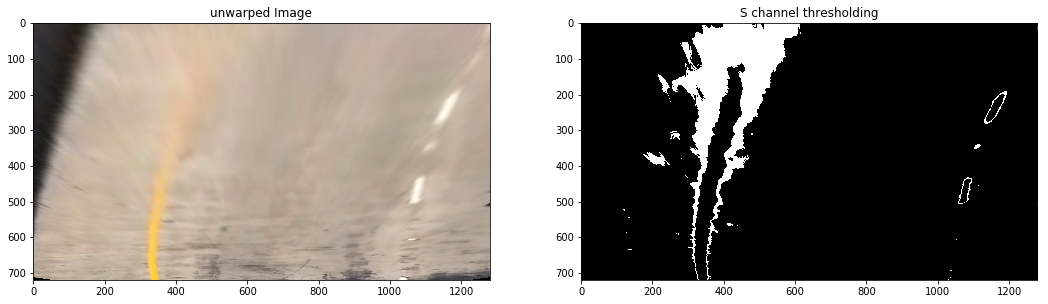

In [22]:
#Now lets see if its working or not...
s_thresh_img = s_thresh(warped_img_2, (85,120))
fig, axs = plt.subplots(1,2, figsize=(18, 13))
axs = axs.ravel()
axs[0].imshow(warped_img_2)
axs[0].set_title('unwarped Image')
axs[1].imshow(s_thresh_img, cmap='gray')
axs[1].set_title('S channel thresholding')

In [130]:
def gradients(image, sobel_k):
    x = cv2.Sobel(image,cv2.CV_64F, 1,0, ksize = sobel_k )
    y = cv2.Sobel(image,cv2.CV_64F, 0,1, ksize = sobel_k )
    return x , y 

def mask(img,threshold):
    img = np.uint8(255*img/np.max(img))
    mask = np.zeros_like(img)
    mask[(img>= threshold[0]) & (img <= threshold[1]) ]  = 1
    return mask

def gradient_magnitude(img, sobel_k = 3 , threshold = (0,255)):
    x , y = gradients(img, sobel_k)
    magnitude = np.sqrt(x**2   + y**2)
    img = mask(magnitude,threshold)
    return img

def gradient_absolute(image, axis = 'x', sobel_k = 3 , threshold = (0,255)):
    x , y = gradients(image,sobel_k)
    if axis == 'x':
        img = np.absolute(cv2.Sobel(image, cv2.CV_64F,1,0,ksize = sobel_k))
    else:
        img = np.absolute(cv2.Sobel(image, cv2.CV_64F,1,0,ksize = sobel_k))
    mask_img  = mask(img,threshold)
    return mask_img


def gradient_directional(image,sobel_k = 3 , threshold = (0,255)):
    x , y = gradients(image,sobel_k)
    img = np.arctan2(np.absolute(y) , np.absolute(x))
    mask = np.zeros_like(img)
    mask[(img>= threshold[0]) & (img <= threshold[1]) ]  = 1
    return mask

def edge_detection(img, threshold = (170,255)):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float32)
    img = img[:,:,2] #s-channel
    
    #get all the threshold
    grad_x   = gradient_absolute(img, axis='x', threshold=(20, 100))
    grad_y   = gradient_absolute(img, axis='y', threshold=(20, 100))
    magnitude = gradient_magnitude(img, threshold=(20, 100)) 
    directional = gradient_directional(img, threshold=(0.7, 1.3)) 
    
    
    t_mask = np.zeros_like(img)
    t_mask[((grad_x == 1) & (grad_y == 1)) | ((magnitude == 1) & (directional == 1))] = 1

    mask = np.zeros_like(img)
    mask[(img>= threshold[0]) & (img <= threshold[1]) ]  = 1

    return mask, t_mask, img

def stack_edge_detection(img):
    c_mask, t_mask , img = edge_detection(img)
    mask = np.zeros_like(t_mask)
    mask[(c_mask == 1) | (t_mask == 1)]  = 1
    return mask

def single_edge_detection(img):
    c_mask, t_mask , img = edge_detection(img)
    return np.dstack((np.zeros_like(img), t_mask, c_mask))

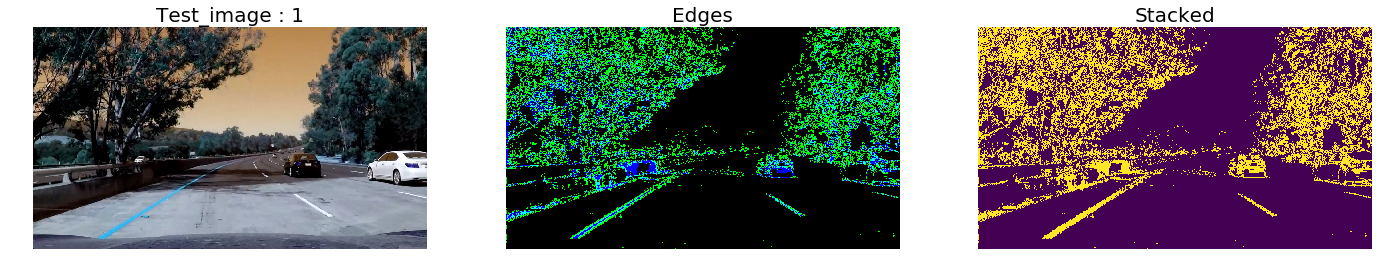

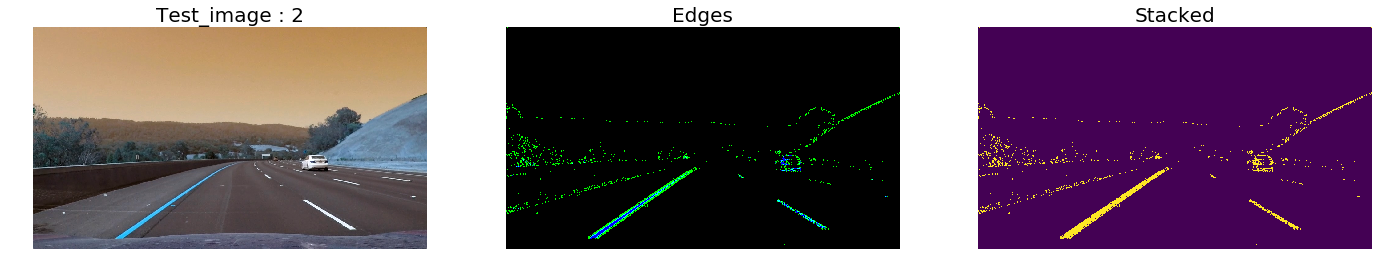

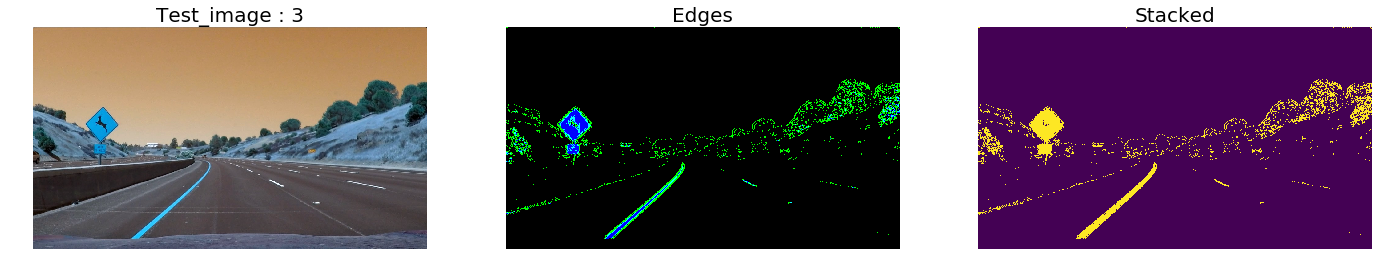

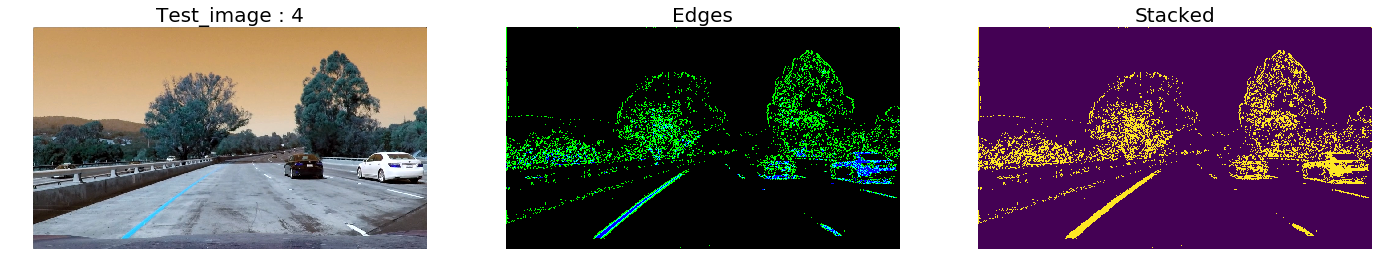

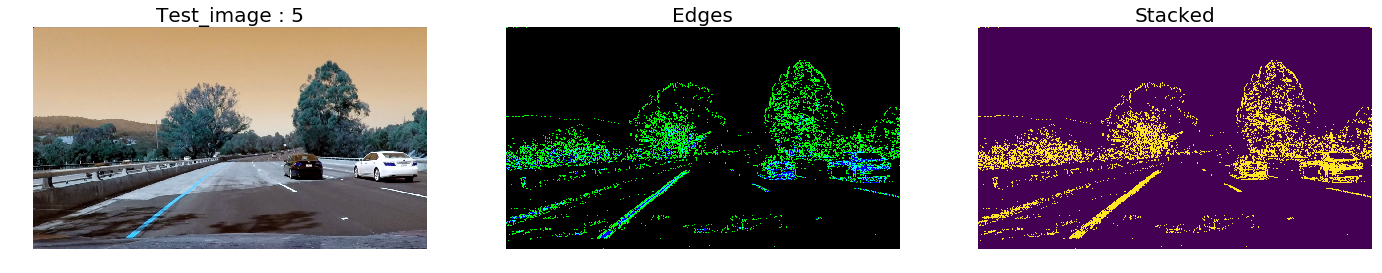

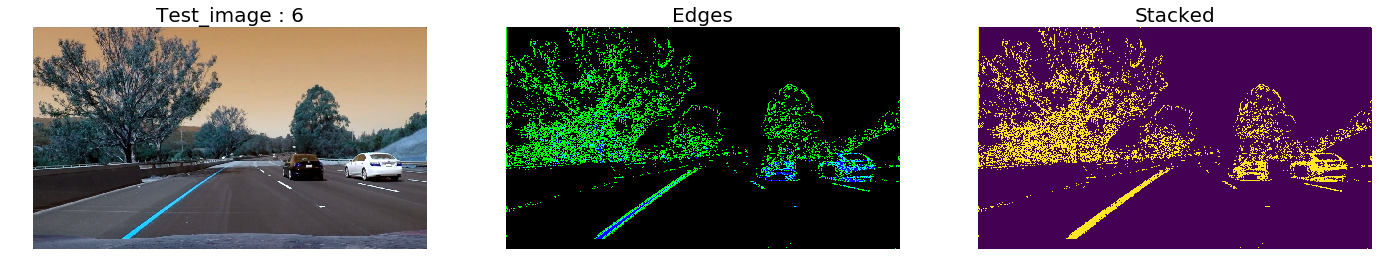

In [131]:
cnt = 1 
for img in glob.glob('test_images/test*.jpg'):
    img = cv2.imread(img)
    edges = single_edge_detection(img)
    stack = stack_edge_detection(img)

    f, (x1, x2, x3) = plt.subplots(1, 3, figsize=(24, 9))
    x1.axis('off')
    x1.imshow(img)
    x1.set_title('Test_image : '+ str(cnt), fontsize=20)

    x2.axis('off')
    x2.imshow(edges)
    x2.set_title('Edges', fontsize=20)
    
    x3.axis('off')
    x3.imshow(stack)
    x3.set_title('Stacked', fontsize=20)
    cnt += 1

In [160]:
class Sliding_window():
    def __init__(self, y_low, y_high , x_cent , margin = 100 , min_pix = 50 ):
        self.x = x_cent
        self.y_high = y_high
        self.y_low = y_low
        self.margin = margin 
        self.min_pix = min_pix
        self.x_mean = x_cent
    
    def find_nonzero_pixels(self, pix , win_x = None ):
        if win_x is not None:
            self.x = win_x
            
        windows_ind = ((pix[0] >= self.y_high) & 
                       (pix[0] < self.y_low) & 
                       (pix[1] >= self.x - self.margin) & 
                       (pix[1] < self.x + self.margin)).nonzero()[0]
        
        if len(windows_ind) > self.min_pix:
            self.x_mean = np.int(np.mean(pix[1][windows_ind]))
        else:
            self.x_mean = self.x
        return windows_ind
    
    def vertices(self):
        return ((self.x-self.margin , self.y_high) , (self.x + self.margin , self.y_low))

In [87]:
class LaneLine(object):
    def  __init__(self, x ,y, h ,w ):
        self.h = h
        self.w = w
        self.coef = deque(maxlen = 5)
        self.fit_points(x,y)
        self.m_p_x_axis = 700
        self.m_p_y_axis = 720
        self.land_w = 3.7
        self.lane_lenght = 30
        
    def fit_points(self,x,y):
        points_gen =  ( len(y) > 0 )  and ((np.max(y) - np.min(y)) > self.h*0.625)
        coef_gen = (len(self.coef) == 0)
        if ( points_gen or coef_gen):
            self.coef.append(np.polyfit(y,x,2))
    
    def generate_points(self):
        y = np.linspace(0,self.h - 1 , self.h)
        fit = np.array(self.coef).mean(axis = 0 )
        return np.stack((fit[0]*y**2 + fit[1]*y + fit[2],y)).astype(np.int).T
    
    def ROC(self):
        y_m_pixel = self.lane_lenght / self.m_p_y_axis     #  3.7 / 660.0 #meter per pixel in x
        x_m_pixel = self.land_w /self.m_p_x_axis           #3.7 / 72.0  #meter per pixel in y
        
        pts = self.generate_points()
        x , y = pts[:,0] , pts[:,1]
        f_cur = np.polyfit(y*y_m_pixel , x*x_m_pixel ,2 )
        f_d = 2*f_cur[0]*self.m_p_y_axis*y_m_pixel + f_cur[1]
        s_d = 2*f_cur[0]
        roc = (((1+(f_d**2)**1.5)/np.absolute(s_d)))
        return (int(roc))
    def distance_from_center(self):
        x_m_pixel = self.land_w /self.m_p_x_axis           #3.7 / 72.0  #meter per pixel in y
        pts = self.generate_points()
        x= pts[np.max(pts[:,1])][0]
        dist = np.absolute((self.w //2 - x )*x_m_pixel)
        return dist

In [163]:
class Pipeline():
    def __init__(self, img):
        self.h =  img.shape[0]
        self.w = img.shape[1]
        self.n_win = 9 
        self.left_lane = None
        self.right_lane = None
        self.right_ws = []
        self.left_ws = []
        self.init_pipeline(img)
        
    def init_pipeline(self,img):
        edges = stack_edge_detection(img)
        trans_edge , _ = Perspective_transform(edges)
        histogram = np.sum(trans_edge[int(self.h/2):,:],axis = 0 )
        non_zero = trans_edge.nonzero()
        
        left_lane_ind =  np.empty([0],dtype = np.int)
        right_lane_ind =  np.empty([0],dtype = np.int)
        w_height  = int(self.h / self.n_win)
        
        for i in range(self.n_win):
            if ( len(self.left_ws) > 0 ):
                l_x_cent  = self.left_ws[-1].x
                r_x_cent  = self.right_ws[-1].x
            else:
                l_x_cent = np.argmax(histogram[:self.w //2])
                r_x_cent = np.argmax(histogram[self.w//2:])   +  self.w // 2
            
            left_w = Sliding_window(y_low = self.h - i*w_height , y_high= self.h - (i+1)*w_height, x_cent= l_x_cent)
            right_w =Sliding_window(y_low = self.h - i*w_height , y_high= self.h - (i+1)*w_height, x_cent= r_x_cent)
            
            left_lane_ind = np.append(left_lane_ind , left_w.find_nonzero_pixels(non_zero),axis = 0)
            right_lane_ind = np.append(right_lane_ind , right_w.find_nonzero_pixels(non_zero),axis = 0)
            self.left_ws.append(left_w)
            self.right_ws.append(right_w)

        self.left_lane = LaneLine(non_zero[1][left_lane_ind], non_zero[0][left_lane_ind], self.h, self.w)
        self.right_lane = LaneLine(non_zero[1][right_lane_ind], non_zero[0][right_lane_ind], self.h, self.w)
        
    def pts_in_window(self,img,wind):
        indices = np.empty([0], dtype = np.int)
        non_zero = img.nonzero()
        win_x =None 
        for win in wind:
            indices = np.append(indices , win.find_nonzero_pixels(non_zero , win_x) , axis = 0 )
            win_x  = win.x_mean
        
        return (non_zero[1][indices], non_zero[0][indices])
    
    def lane_overlap(self,img, unwarp = None):
#         print ('in_lane_overlap')
        overlay = np.zeros_like(img).astype(np.uint8)
        pts = np.vstack((self.left_lane.generate_points(), np.flipud(self.right_lane.generate_points())))
        cv2.fillPoly(overlay , [pts]  , (0,255,0) )
        
        if unwarp is not None:
            overlay = cv2.warpPerspective(overlay, unwarp , (img.shape[1], img.shape[0]))
        return (cv2.addWeighted(img,0.6,overlay,0.4,0))
    
        
    
    
    def _roc(self):
        rad = int(np.average([self.left_lane.ROC() , self.right_lane.ROC()]))
        return rad
           
    def put_text(self,img, text,x,y):
        cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 2)
        
    def run_pipeline(self, img):
        edges = stack_edge_detection(img)
        trans_edge , unwarp_m = Perspective_transform(edges)

        (left_x,left_y) =  self.pts_in_window(trans_edge , self.left_ws )
        self.left_lane.fit_points(left_x, left_y)
#         print (self.left_lane.coef)
        
        
        (right_x,right_y) =  self.pts_in_window(trans_edge , self.right_ws )
        self.right_lane.fit_points(right_x, right_y)
        
        lane_width = self.left_lane.distance_from_center() + self.right_lane.distance_from_center() 
        off_from_center = self.right_lane.distance_from_center() - lane_width / 2
        cv2.putText(img, 'Radius_of_curvature : %.2f' %self._roc(), (20,40), cv2.FONT_HERSHEY_SIMPLEX,1 ,(255,255,255),2)
        cv2.putText(img , 'Distance From the Center : %.2f ' %(off_from_center) ,(20,80),cv2.FONT_HERSHEY_SIMPLEX , 1 ,(255,255,255),2)
    
        img = self.lane_overlap(img, unwarp_m)
        
        return img
        

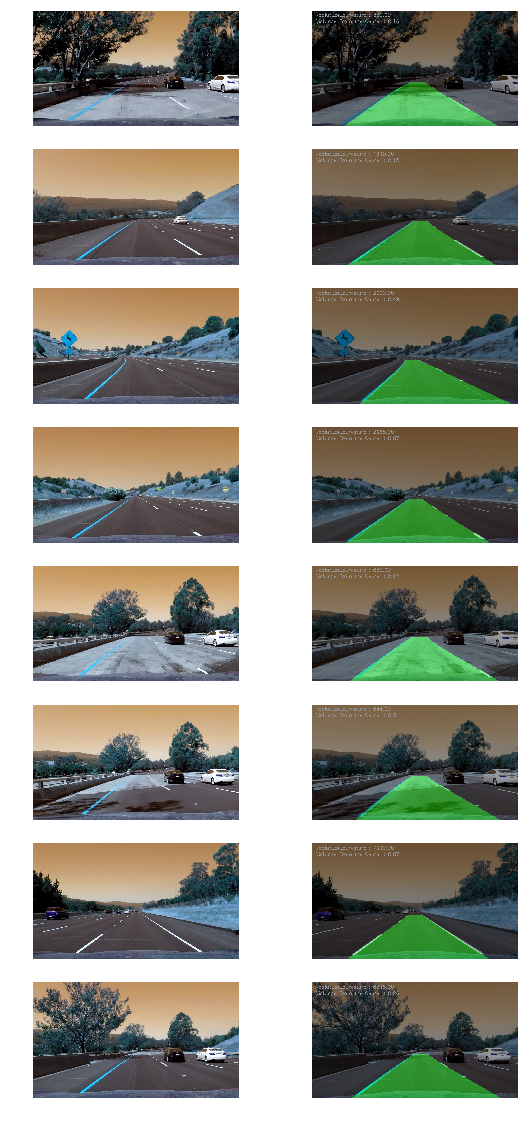

In [164]:
# img = mpimg.imread('test_images')
# caliberated_img = camera(img)
# pipeline = Pipeline(caliberated_img)
# overlay = pipeline.run_pipeline(caliberated_img)  
# cv2.imwrite(image_path.replace('test_images', 'output_images'), overlay)
# # plt.figure(figsize=(10, 10))
# plt.imshow(overlay)
# plt.show()

images = glob.glob('./test_images/*.jpg')                                          
fig, axs = plt.subplots(len(images),2, figsize=(10, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
k = 0
for image in images:
    img = cv2.imread(image)
    caliberated_img = camera(img)
    pipeline = Pipeline(caliberated_img)
    overlay = pipeline.run_pipeline(caliberated_img)  
    cv2.imwrite(image_path.replace('test_images', 'output_images'), overlay)
    axs[k].imshow(img)
    axs[k].axis('off')
    k += 1
    axs[k].imshow(overlay, cmap='gray')
    axs[k].axis('off')
    k += 1


In [151]:
from moviepy.editor import VideoFileClip

In [158]:
def video_output(video):
    output_video_file = 'final_video.mp4'
#     input_v = VideoFileClip(video)
    input_v = VideoFileClip("project_video.mp4")
    img = camera(input_v.get_frame(0)) 
    pipeline = Pipeline(img)

    output_video = input_v.fl_image(pipeline.run_pipeline)

    %time output_video.write_videofile(output_video_file, audio=False)

In [159]:
video_output('project_video')

[MoviePy] >>>> Building video final_video.mp4
[MoviePy] Writing video final_video.mp4


100%|█████████▉| 1260/1261 [05:52<00:00,  3.17it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: final_video.mp4 

CPU times: user 7min 24s, sys: 3.24 s, total: 7min 28s
Wall time: 5min 54s
